## Diabetes Prediction with ANN

### Libraries

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [52]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

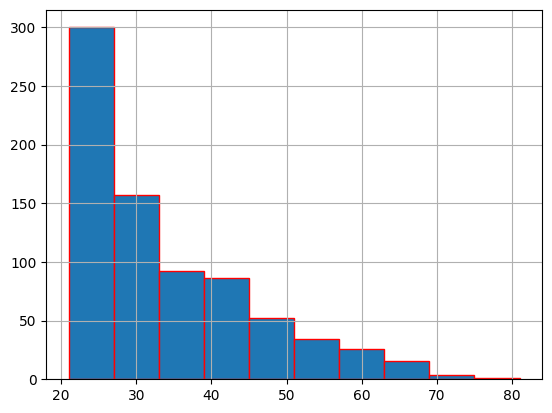

In [53]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "red");


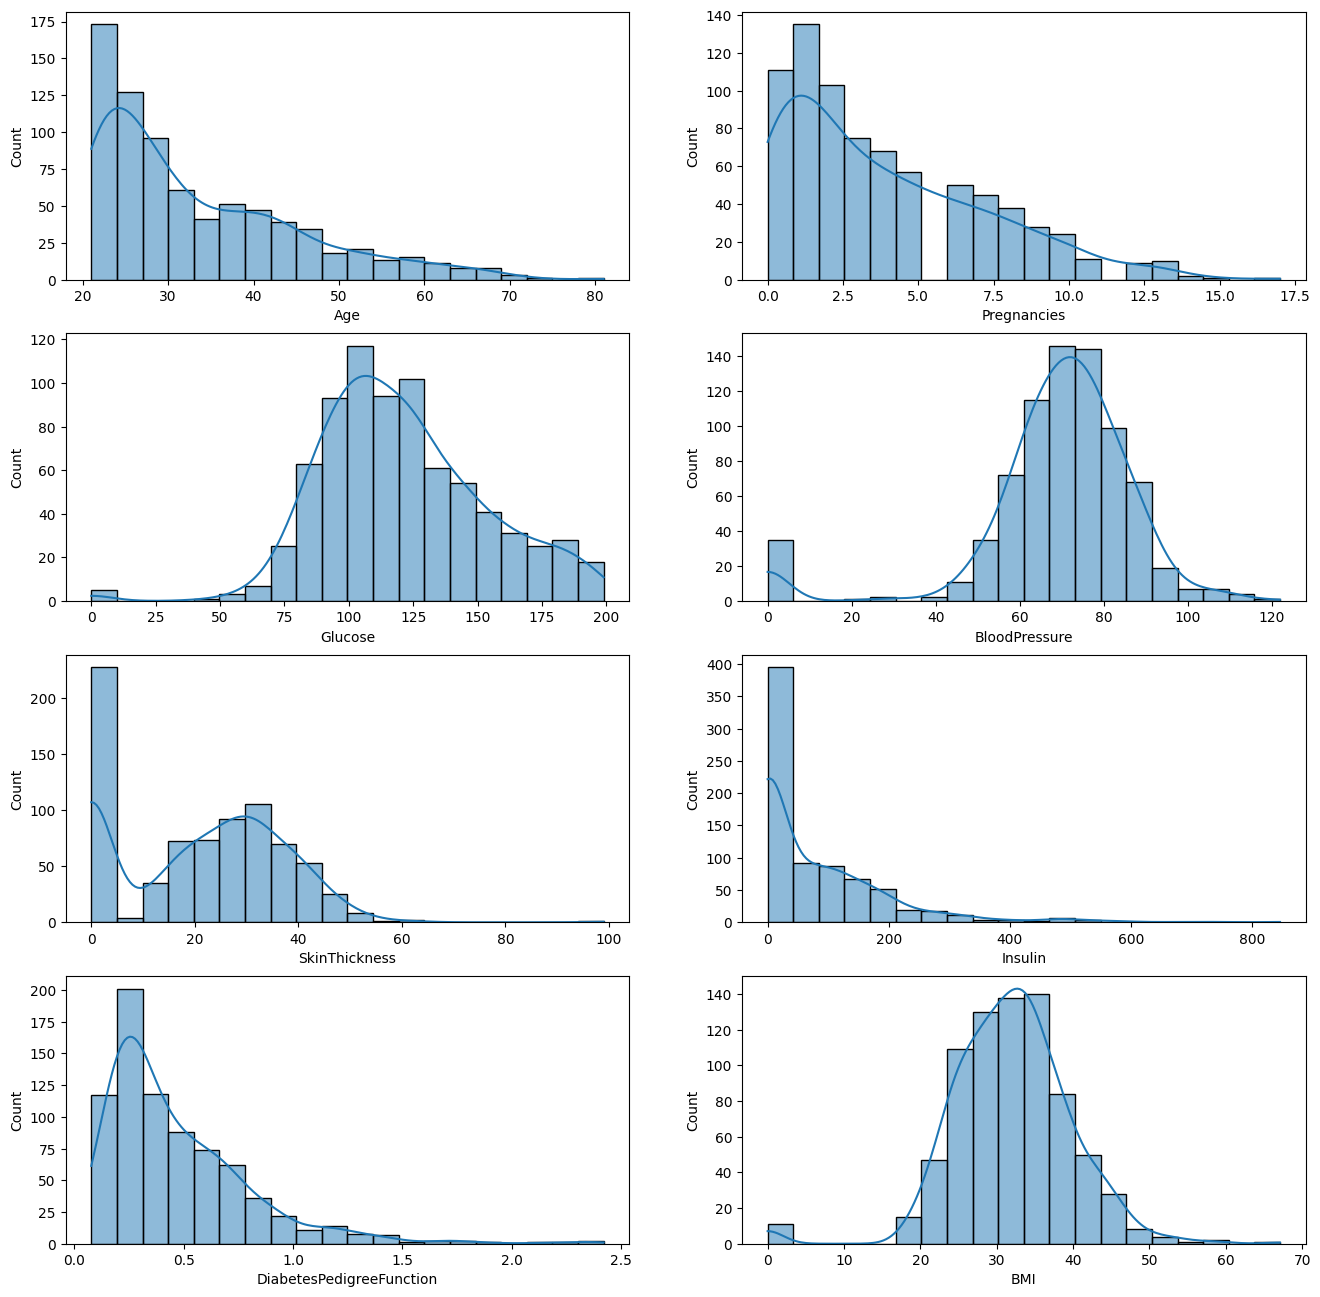

In [54]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Age, bins = 20, ax=ax[0,0], kde=True)
sns.histplot(df.Pregnancies, bins = 20, ax=ax[0,1], kde=True)
sns.histplot(df.Glucose, bins = 20, ax=ax[1,0], kde=True)
sns.histplot(df.BloodPressure, bins = 20, ax=ax[1,1], kde=True)
sns.histplot(df.SkinThickness, bins = 20, ax=ax[2,0], kde=True)
sns.histplot(df.Insulin, bins = 20, ax=ax[2,1], kde=True)
sns.histplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], kde=True)
sns.histplot(df.BMI, bins = 20, ax=ax[3,1], kde=True)
plt.show()

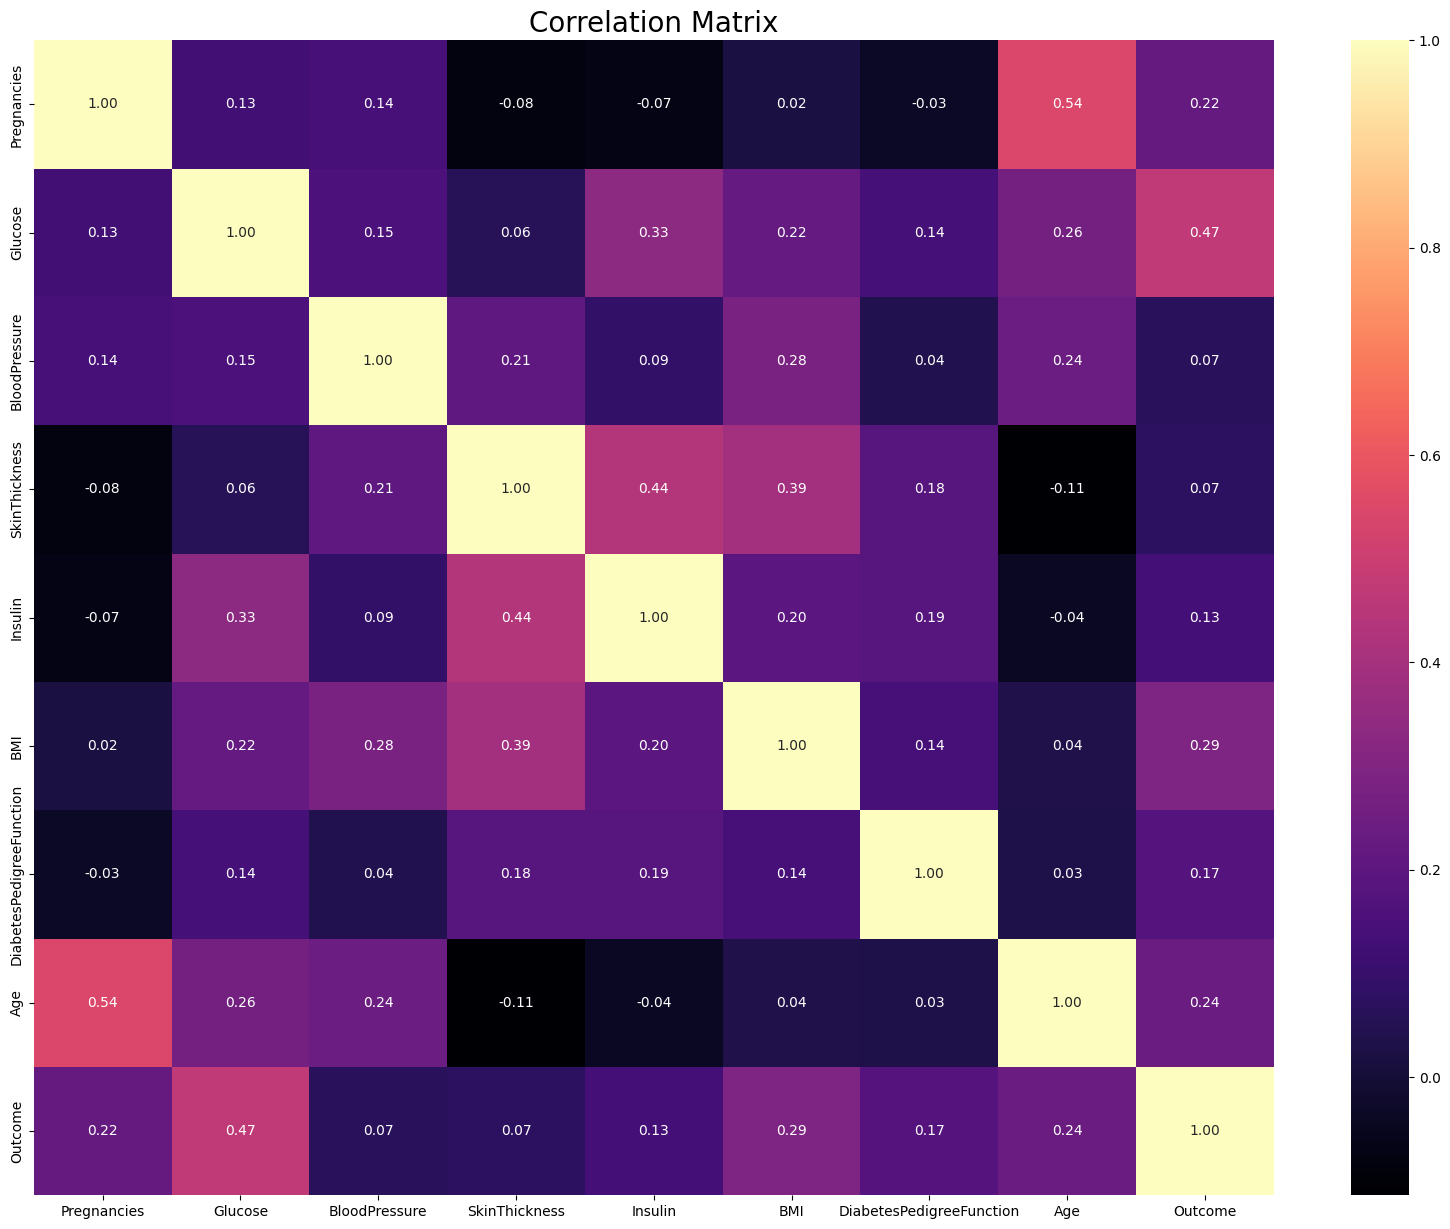

In [55]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [56]:
X=df.drop("Outcome", axis=1)
y=df['Outcome']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [59]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(8,activation="relu", input_shape=(8,)))
model.add(Dense(8, activation ="relu"))
model.add(Dense(1, activation ='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50,batch_size=1, verbose=1 )

Epoch 1/50
614/614 [==============================] - 2s 2ms/step - loss: 0.8464 - accuracy: 0.6498
Epoch 2/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6474 - accuracy: 0.6531
Epoch 3/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.6531
Epoch 4/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6465 - accuracy: 0.6531
Epoch 5/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6462 - accuracy: 0.6531
Epoch 6/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6466 - accuracy: 0.6531
Epoch 7/50
614/614 [==============================] - 2s 3ms/step - loss: 0.6466 - accuracy: 0.6531
Epoch 8/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.6531
Epoch 9/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6466 - accuracy: 0.6531
Epoch 10/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6466 - accuracy: 0.6531

In [61]:
score=model.evaluate(X_test, y_test, verbose=1)

5/5 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6429


There were added another model which are better for predict

In [62]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold


# Validation scores of all base models



models = []
models.append(('LR', LogisticRegression(random_state = 21, max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 21)))
models.append(('RF', RandomForestClassifier(random_state = 21)))
models.append(('SVM', SVC(gamma='auto', random_state = 21)))
models.append(('XGB', GradientBoostingClassifier(random_state = 21)))


# evaluate each model in turn
results = []
names = []

kfold = KFold(n_splits = 5, random_state = 21, shuffle=True)

for name, model in models:

        cv_results = cross_val_score(model, X, y, cv = kfold, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.769561 (0.029633)
KNN: 0.705806 (0.043790)
CART: 0.691410 (0.017678)
RF: 0.763059 (0.027757)
SVM: 0.651091 (0.024880)
XGB: 0.739589 (0.014146)
